In [3]:
# Установка и импорт необходимых библиотек
# !pip install -q -U kaggle_environments

import numpy as np
import pandas as pd
import random
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

from kaggle_environments import make, evaluate

warnings.filterwarnings('ignore')


In [2]:
%%writefile agents/rock_agent.py
# Определение агентов (ботов)

# 1. Агент, который всегда играет "камень"

def rock_agent(observation, configuration):
    # Всегда возвращаем 0 (камень)
    return 0


Writing agents/rock_agent.py


In [3]:
%%writefile agents/paper_agent.py
# 2. Агент, который всегда играет "бумагу"

def paper_agent(observation, configuration):
    # Всегда возвращаем 1 (бумага)
    return 1


Writing agents/paper_agent.py


In [4]:
%%writefile agents/scissors_agent.py
# 3. Агент, который всегда играет "ножницы"

def scissors_agent(observation, configuration):
    # Всегда возвращаем 2 (ножницы)
    return 2


Writing agents/scissors_agent.py


In [5]:
%%writefile agents/copy_opponent_agent.py
# 4. Агент, который копирует ход противника

import random

def copy_opponent_agent(observation, configuration):
    # Если это не первый ход, копируем предыдущий ход противника
    if observation.step > 0:
        return observation.lastOpponentAction
    else:
        # Иначе выбираем случайный ход
        return random.randrange(0, configuration.signs)


Writing agents/copy_opponent_agent.py


In [6]:
%%writefile agents/reactionary_agent.py
# 5. Реактивный агент, который играет ход, побеждающий предыдущий ход противника

import random

def reactionary_agent(observation, configuration):
    # Если это не первый ход, играем ход, побеждающий предыдущий ход противника
    if observation.step > 0:
        return (observation.lastOpponentAction + 1) % 3
    else:
        # Иначе выбираем случайный ход
        return random.randrange(0, configuration.signs)


Writing agents/reactionary_agent.py


In [7]:
%%writefile agents/counter_reactionary_agent.py
# 6. Контр-реактивный агент, который играет ход, проигрывающий предыдущему ходу противника

import random

def counter_reactionary_agent(observation, configuration):
    # Если это не первый ход, играем ход, проигрывающий предыдущему ходу противника
    if observation.step > 0:
        return (observation.lastOpponentAction + 2) % 3
    else:
        # Иначе выбираем случайный ход
        return random.randrange(0, configuration.signs)


Writing agents/counter_reactionary_agent.py


In [8]:
%%writefile agents/statistical_agent.py
# 7. Статистический агент, который анализирует частоту ходов противника

def statistical_agent(observation, configuration):
    import random
    from collections import Counter

    if observation.step == 0:
        statistical_agent.opponent_history = []
    else:
        statistical_agent.opponent_history.append(observation.lastOpponentAction)

    if observation.step > 0:
        # Находим наиболее часто встречающийся ход противника
        count = Counter(statistical_agent.opponent_history)
        most_common = count.most_common(1)[0][0]
        # Играем ход, побеждающий наиболее частый ход противника
        return (most_common + 1) % 3
    else:
        return random.randrange(0, configuration.signs)


Writing agents/statistical_agent.py


In [9]:
%%writefile agents/random_agent.py
# 8. Случайный агент, который выбирает ход случайно

import random

def random_agent(observation, configuration):
    # Возвращаем случайный ход
    return random.randrange(0, configuration.signs)


Writing agents/random_agent.py


In [10]:
%%writefile agents/pattern_agent.py
# 9. Агент, который циклически перебирает ходы "камень", "бумага", "ножницы"

def pattern_agent(observation, configuration):
    if observation.step == 0:
        pattern_agent.next_move = 0
    move = pattern_agent.next_move
    pattern_agent.next_move = (pattern_agent.next_move + 1) % 3
    return move


Writing agents/pattern_agent.py


In [11]:
%%writefile agents/mirror_opponent_agent.py
# 10. Агент, который повторяет ход противника двух ходов назад

import random

def mirror_opponent_agent(observation, configuration):
    if observation.step == 0:
        mirror_opponent_agent.opponent_history = []
    else:
        mirror_opponent_agent.opponent_history.append(observation.lastOpponentAction)

    if observation.step >= 2:
        # Повторяем ход противника двух ходов назад
        return mirror_opponent_agent.opponent_history[-2]
    else:
        # Иначе выбираем случайный ход
        return random.randrange(0, configuration.signs)


Writing agents/mirror_opponent_agent.py


In [12]:
%%writefile agents/weighted_random_agent.py
# 11. Агент, который выбирает "камень" с вероятностью 40%, а "бумагу" и "ножницы" с вероятностью 30%

import random

def weighted_random_agent(observation, configuration):
    # Используем взвешенный выбор
    return random.choices([0, 1, 2], weights=[0.4, 0.3, 0.3])[0]


Writing agents/weighted_random_agent.py


In [13]:
%%writefile agents/reactive_agent.py
# 12. Реактивный агент, который играет "ножницы", если противник сыграл "бумагу" на предыдущем ходу

import random

def reactive_agent(observation, configuration):
    # Если противник сыграл "бумагу" на предыдущем ходу, играем "ножницы"
    if observation.step > 0 and observation.lastOpponentAction == 1:
        return 2
    else:
        # Иначе играем "камень"
        return 0


Writing agents/reactive_agent.py


In [14]:
%%writefile agents/beat_frequent_agent.py
# 13. Агент "Beat Frequent", который анализирует последние N ходов противника, 
# определяет наиболее часто встречающийся ход и играет ход, побеждающий его

def beat_frequent_agent(observation, configuration):
    import random
    from collections import Counter

    N = 5  # Количество последних ходов для анализа

    if observation.step == 0:
        beat_frequent_agent.opponent_history = []
    else:
        beat_frequent_agent.opponent_history.append(observation.lastOpponentAction)

    if observation.step >= N:
        # Анализируем последние N ходов противника
        recent_actions = beat_frequent_agent.opponent_history[-N:]
        count = Counter(recent_actions)
        most_common = count.most_common(1)[0][0]
        # Играем ход, побеждающий наиболее частый ход
        return (most_common + 1) % 3
    else:
        # Если недостаточно данных, выбираем случайный ход
        return random.randrange(0, configuration.signs)


Writing agents/beat_frequent_agent.py


In [15]:
%%writefile agents/meta_agent.py
# 14. Агент "Meta", который пытается предсказать следующий ход противника 
# на основе их предыдущего поведения и играет ход, побеждающий этот прогноз

def meta_agent(observation, configuration):
    import random

    if observation.step == 0:
        meta_agent.opponent_history = []
    else:
        meta_agent.opponent_history.append(observation.lastOpponentAction)

    if observation.step > 1:
        # Предполагаем, что противник будет реагировать на наш предыдущий ход
        predicted_opponent_move = (meta_agent.opponent_history[-1] + 1) % 3
        # Играем ход, побеждающий предположенный ход противника
        return (predicted_opponent_move + 1) % 3
    else:
        # Если недостаточно данных, выбираем случайный ход
        return random.randrange(0, configuration.signs)


Writing agents/meta_agent.py


In [4]:
# Запуск турнира между агентами

# Список агентов
agents = ['rock_agent', 'paper_agent', 'scissors_agent',
          'copy_opponent_agent', 'reactionary_agent', 
          'counter_reactionary_agent', 'statistical_agent',
          'random_agent', 'pattern_agent',
          'mirror_opponent_agent', 'weighted_random_agent',
          'reactive_agent', 'beat_frequent_agent', 'meta_agent']

# Добавляем расширение .py к именам агентов
agents_py = ["agents/" + agent + ".py" for agent in agents]
n_agents = len(agents)

# Создаем окружение игры
env = make("rps", configuration={"episodeSteps": 100, "tieRewardThreshold": 1})

# Инициализация матрицы результатов
scores = np.zeros((n_agents, n_agents))

In [5]:
# Проведение турнира: каждый агент играет с каждым
for i in range(n_agents):
    for j in range(i + 1, n_agents):
        result = evaluate(
            "rps", 
            [agents_py[i], agents_py[j]], 
            configuration={"episodeSteps": 100, "tieRewardThreshold": 1},
            num_episodes=1
        )
        # Сохраняем результаты
        scores[i][j] = result[0][0]  # Результат для агента i
        scores[j][i] = result[0][1]  # Результат для агента j


In [6]:
# Определение победителей
victories = []
for i in range(n_agents):
    # Считаем количество побед (счет больше, чем у противника)
    wins = sum(1 for j in range(n_agents) if scores[i][j] > scores[j][i])
    victories.append(wins)

# Максимальное количество побед
max_wins = max(victories)

# Находим агентов с максимальным количеством побед
winners = [agents[i] for i, v in enumerate(victories) if v == max_wins]

# Выводим победителя(ей)
if len(winners) > 1:
    print("Победители:", ', '.join(winners))
else:
    print("Победитель:", winners[0])


Победители: statistical_agent, beat_frequent_agent


In [7]:
# Визуализация результатов

# Создаем DataFrame с результатами
df_scores = pd.DataFrame(scores, index=agents, columns=agents)
df_scores


,rock_agent,paper_agent,scissors_agent,copy_opponent_agent,reactionary_agent,counter_reactionary_agent,statistical_agent,random_agent,pattern_agent,mirror_opponent_agent,weighted_random_agent,reactive_agent,beat_frequent_agent,meta_agent
rock_agent,0.0,-99.0,99.0,-1.0,-98.0,99.0,-97.0,4.0,0.0,-1.0,2.0,0.0,-93.0,95.0
paper_agent,99.0,0.0,-99.0,-1.0,-99.0,97.0,-98.0,3.0,0.0,0.0,-10.0,-97.0,-96.0,96.0
scissors_agent,-99.0,99.0,0.0,1.0,-97.0,99.0,-97.0,10.0,0.0,1.0,-2.0,-99.0,-91.0,98.0
copy_opponent_agent,1.0,1.0,-1.0,0.0,99.0,50.0,-20.0,-3.0,-98.0,0.0,-5.0,-1.0,-25.0,-97.0
reactionary_agent,98.0,99.0,97.0,-99.0,0.0,-50.0,57.0,11.0,0.0,-33.0,6.0,24.0,51.0,-48.0
counter_reactionary_agent,-99.0,-97.0,-99.0,-50.0,50.0,0.0,-99.0,-13.0,98.0,33.0,7.0,-98.0,-91.0,1.0
statistical_agent,97.0,98.0,97.0,20.0,-57.0,99.0,0.0,2.0,0.0,26.0,6.0,-1.0,-44.0,98.0
random_agent,-4.0,-3.0,-10.0,3.0,-11.0,13.0,-2.0,0.0,2.0,12.0,-1.0,-11.0,4.0,4.0
pattern_agent,0.0,0.0,0.0,98.0,0.0,-98.0,0.0,-2.0,0.0,-95.0,-3.0,33.0,94.0,-97.0
mirror_opponent_agent,1.0,0.0,-1.0,0.0,33.0,-33.0,-26.0,-12.0,95.0,0.0,3.0,0.0,-37.0,-31.0


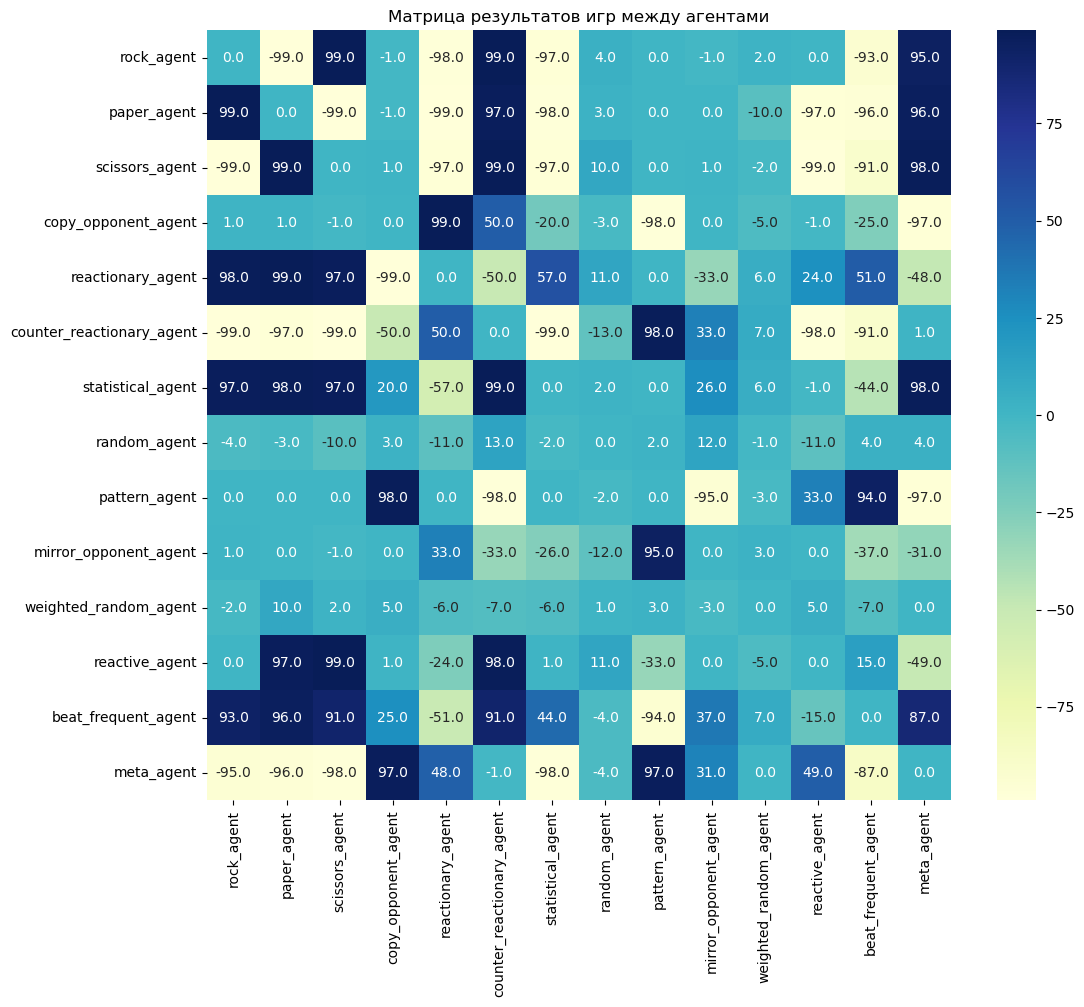

In [8]:
# Построение тепловой карты результатов
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(df_scores, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Матрица результатов игр между агентами")
plt.show()


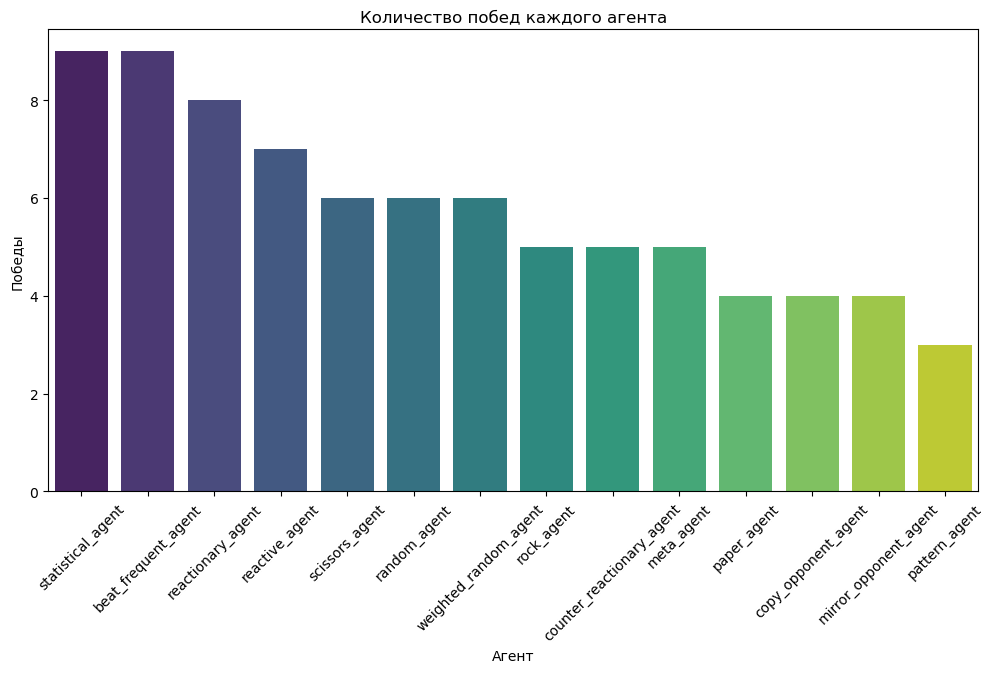

In [9]:
# Построение столбчатой диаграммы количества побед
df_victories = pd.DataFrame({
    'Агент': agents,
    'Победы': victories
}).sort_values(by='Победы', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=df_victories, x='Агент', y='Победы', palette="viridis")
plt.title("Количество побед каждого агента")
plt.xticks(rotation=45)
plt.show()
